In [6]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=UserWarning)

In [7]:
import pandas as pd
import numpy as np
import re

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rc('font', family='Malgun Gothic')

In [9]:
park = pd.read_csv('../../data/서울시 주요 공원현황.csv')
park.shape

(132, 20)

In [10]:
park.head()

,공원번호,공원명,공원개요,면적,개원일,주요시설,주요식물,안내도,오시는길,이용시참고사항,이미지,지역,공원주소,관리부서,전화번호,X좌표(GRS80TM),Y좌표(GRS80TM),X좌표(WGS84),Y좌표(WGS84),바로가기
0,1,남산도시자연공원,남산공원은 도심에 위치하여 서울시민에게 맑은 공기를 제공하는 자연휴식처이며 산책 꽃...,2896887㎡ 임 야 : 2454140㎡ 녹지대 및 기타시설 : 442747㎡,1968.9.10,기반시설 : 광장 45950㎡ 도로 108530㎡ 산책로 6.7㎞ (북측:3.7㎞/...,소나무 단풍 아카시아 상수리나무 등 191종 2881870주,http://parks.seoul.go.kr/upload/seditorMulti/2...,명동역(남산케이블카 와룡묘 서울애니메이션센터 방면) 도보 명동역 3번출구 → 퍼시픽...,남산공원 차량통행 금지안내 2005년 5월 1일부터 남산공원에 일반승용차 택시 통행...,http://parks.seoul.go.kr/file/info/view.do?fId...,중구,서울특별시 중구 삼일대로 231(예장동),서울특별시중부푸른도시사업소,02-3783-5900,198364.107,450395.554,126.990377,37.550140,http://parks.seoul.go.kr/template/sub/namsan.do
1,3,길동생태공원,길동생태공원은 생물의 서식처를 제공하고 종다양성을 증진시키며 자연생태계의 생물들을 ...,80683㎡,1999.5.20,탐방객안내소 야외전시대 관찰대 목재데크 조류관찰대 길동생태문화센터,소나무 보리수 등 64종 31800주 산국 부들 등 138종 192800본,http://parks.seoul.go.kr/template/common/img/p...,NaN,매주 월요일은 휴관입니다 사전예약 후 입장하실 수 있습니다. ▶ 인터넷 예약 바로가...,http://parks.seoul.go.kr/file/info/view.do?fId...,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),동부공원녹지사업소 길동생태공원,02-489-2770,213554.120,448852.675,127.154779,37.540394,http://parks.seoul.go.kr/template/sub/gildong.do
2,4,서울대공원,서울대공원은 세계 각국의 야생동물들이 살아 숨 쉬는 서울동물원과 다양한 재미와 즐거...,9132690m²,1984.5.1,동물원 식물원 테마가든(장미원 어린이동물원 피크닉장) 치유숲 산림욕장 캠핑장 국립현...,NaN,NaN,지하철 4호선 대공원역 하차(2번 출구) 도보 15분 정도 문의처 02)500-73...,일반사항 공원을 깨끗하게 이용합니다. 대중교통을 이용해 주세요. 기념물 시설물 풀과...,http://parks.seoul.go.kr/file/info/view.do?fId...,과천시,경기도 과천시 대공원광장로 102,전략기획실,02-500-7032,200994.267,437163.981,127.019847,37.426449,http://grandpark.seoul.go.kr/
3,5,서울숲,당초 골프장 승마장 등이 있던 뚝섬일대를 주거업무 지역으로 개발할 경우 약 4조원에...,480994㎡,2005.6.18,4개 테마공원: 문화예술공원 자연생태숲 자연체험학습원 습지생태원 주요시설: 가족마당...,수 목 : 소나무 섬잣나무 계수나무 외 95종 415795주 식물원 : 선인장 등 ...,http://parks.seoul.go.kr/template/common/img/p...,NaN,지하철 분당선 서울숲역 3번출구 도보로 약5분 2호선 뚝섬역 8번출구 도보로 약 1...,http://parks.seoul.go.kr/file/info/view.do?fId...,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),서울숲 관리사무소,02-460-2905,203695.432,449290.726,127.041798,37.543072,http://parks.seoul.go.kr/template/sub/seoulfor...
4,6,월드컵공원,월드컵공원은 서울의 서쪽에 위치하여 1978년부터 1993년까지 15년간 서울시민이...,2284085㎡,2002.5.1,평화의 공원 월드컵공원전시관(879㎡) 유니세프광장(2400㎡) 평화광장(5217㎡...,NaN,http://parks.seoul.go.kr/template/common/img/p...,지하철 6호선 월드컵경기장역 하차 → 1번 출구로 나온 후 직진 → 큰길(도로)이 ...,일반사항 공원을 깨끗하게 이용합니다. 대중교통을 이용해 주세요. 기념물 시설물 풀과...,http://parks.seoul.go.kr/file/info/view.do?fId...,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),월드컵공원,02-300-5500,190658.070,451598.831,126.878907,37.571805,http://parks.seoul.go.kr/template/sub/worldcup...


In [11]:
park=park[park['지역']!='과천시']

In [12]:
park['지역'].value_counts()

종로구     12
강서구      9
은평구      7
동작구      7
송파구      7
강동구      7
강남구      7
서초구      6
중랑구      6
도봉구      6
성동구      5
마포구      5
영등포구     5
양천구      5
중구       5
금천구      4
서대문구     4
강북구      4
동대문구     4
구로구      4
성북구      3
노원구      2
용산구      2
관악구      2
광진구      2
Name: 지역, dtype: int64

In [13]:
park['공원갯수'] =''

In [14]:
park[['지역','공원갯수']].tail()

,지역,공원갯수
127,중랑구,
128,마포구,
129,NaN,
130,강남구,
131,중구,


In [15]:
park['지역'].isnull().sum()

1

In [16]:
park.drop([129], inplace=True)

In [17]:
park.shape

(130, 21)

In [18]:
park_result = park.groupby(park['지역']).count()
park_result = park_result.reset_index()
park_result.head()

,지역,공원번호,공원명,공원개요,면적,개원일,주요시설,주요식물,안내도,오시는길,...,이미지,공원주소,관리부서,전화번호,X좌표(GRS80TM),Y좌표(GRS80TM),X좌표(WGS84),Y좌표(WGS84),바로가기,공원갯수
0,강남구,7,7,7,7,7,7,6,2,4,...,7,7,7,7,4,4,7,7,0,7
1,강동구,7,7,7,7,7,7,6,5,5,...,7,7,7,7,6,6,7,7,2,7
2,강북구,4,4,4,4,4,3,3,4,4,...,4,4,4,4,4,4,4,4,1,4
3,강서구,9,9,9,9,9,9,9,7,9,...,9,9,9,9,9,9,9,9,0,9
4,관악구,2,2,2,2,2,2,2,0,2,...,2,2,2,2,2,2,2,2,0,2


In [19]:
park_result[['지역','공원갯수']]

,지역,공원갯수
0,강남구,7
1,강동구,7
2,강북구,4
3,강서구,9
4,관악구,2
5,광진구,2
6,구로구,4
7,금천구,4
8,노원구,2
9,도봉구,6


In [20]:
park_result['공원갯수'].sum()

130

In [21]:
park_result['공원갯수'].mean()

5.2

In [22]:
# park_result['지역별공원비율'] = round(park_result['공원갯수']/(park_result['공원 수'].sum())*100,2)
park_result['지역별공원비율'] = round(park_result['공원갯수']/(park_result['공원갯수'].mean()),2)
park_result['전체평균갯수'] = park_result['공원갯수'].mean()

In [23]:
park_rate=park_result[['지역','공원갯수','전체평균갯수']]
park_rate

,지역,공원갯수,전체평균갯수
0,강남구,7,5.2
1,강동구,7,5.2
2,강북구,4,5.2
3,강서구,9,5.2
4,관악구,2,5.2
5,광진구,2,5.2
6,구로구,4,5.2
7,금천구,4,5.2
8,노원구,2,5.2
9,도봉구,6,5.2


In [27]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() =='Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unkonwn systme...')

In [32]:
gu = '강남구'
park_per_rate=park_rate[park_rate['지역'].str.contains(gu)]
park_per_rate.columns = ['지역',gu,'전체평균갯수']
park_per_rate

,지역,강남구,전체평균갯수
0,강남구,7,5.2


In [1]:
print('본인이 살고 있는 "구"를 선택해주세요.', gu)

NameError: name 'gu' is not defined

In [ ]:
park_rate.to_csv('../../data/park_rate.csv', sep=',', encoding = 'utf-8')

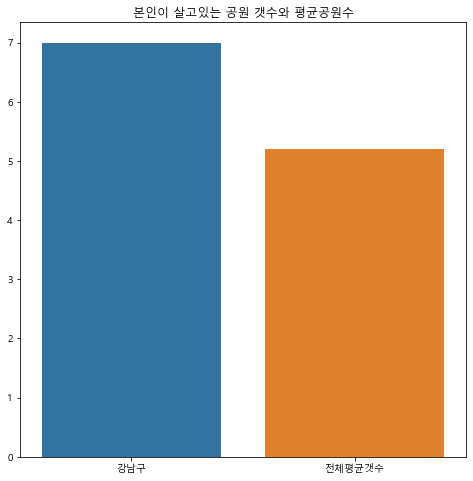

In [34]:
plt.figure(figsize=(8,8))
plt.title("본인이 살고있는 공원 갯수와 평균공원수")
sns.barplot(data=park_per_rate)



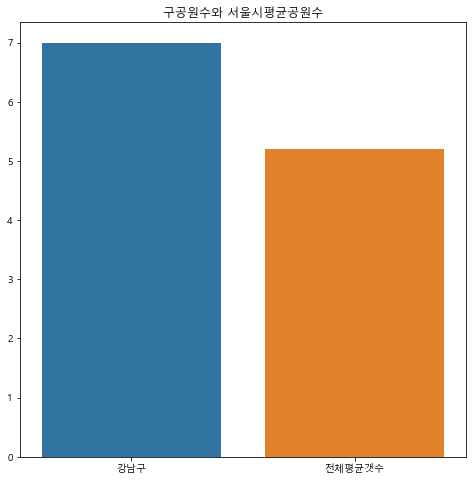

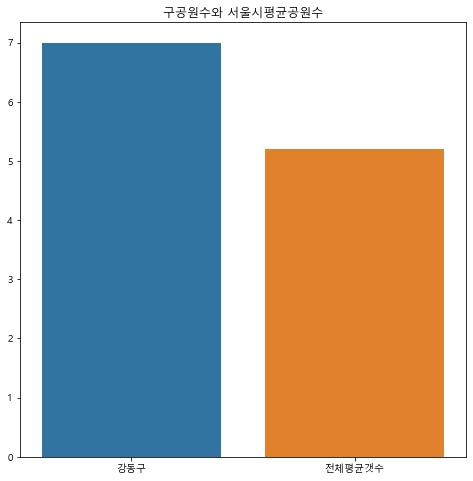

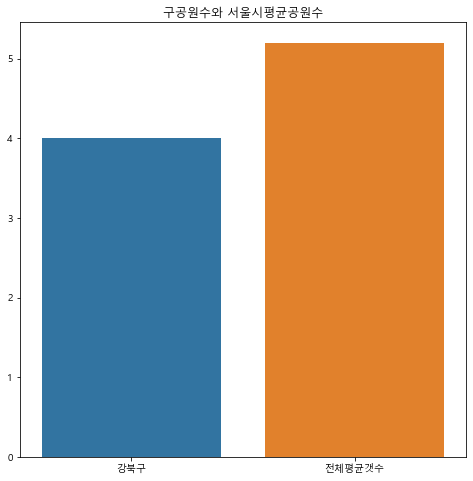

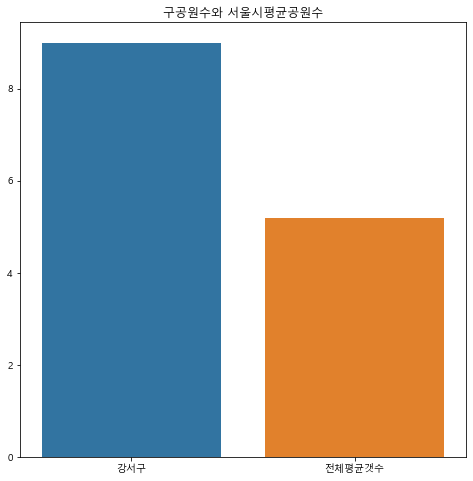

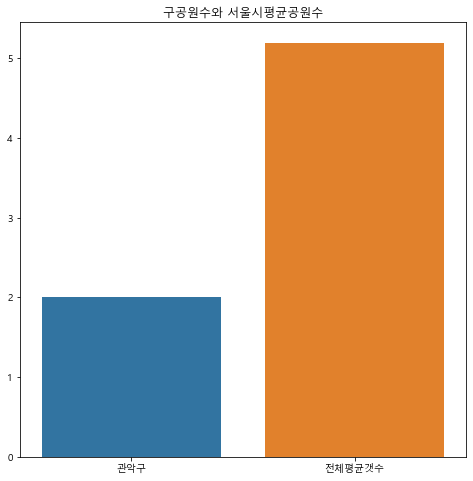

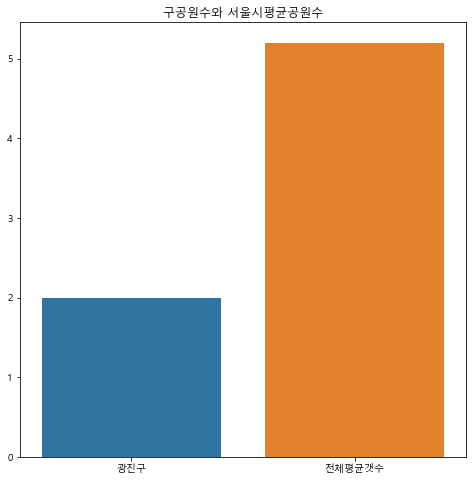

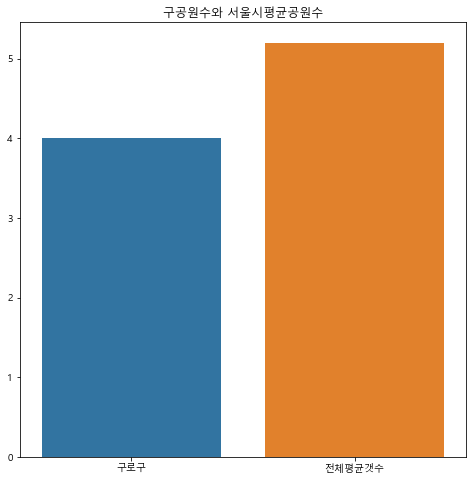

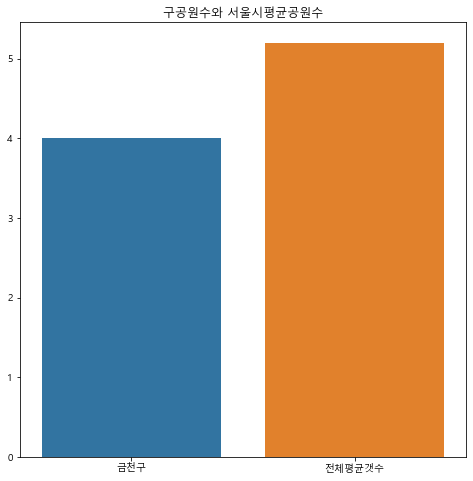

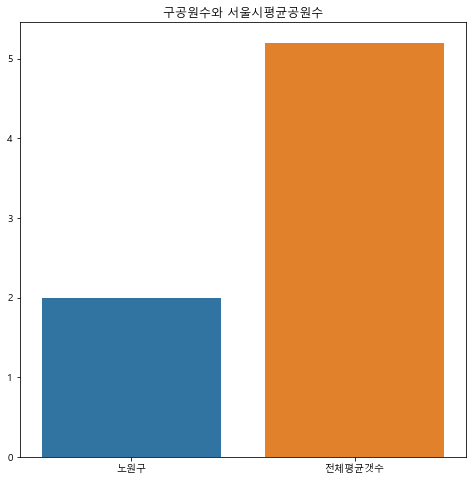

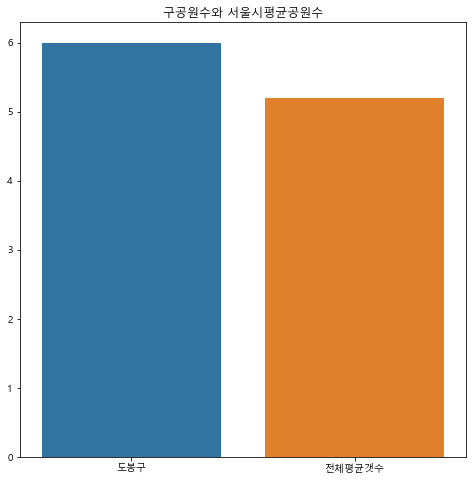

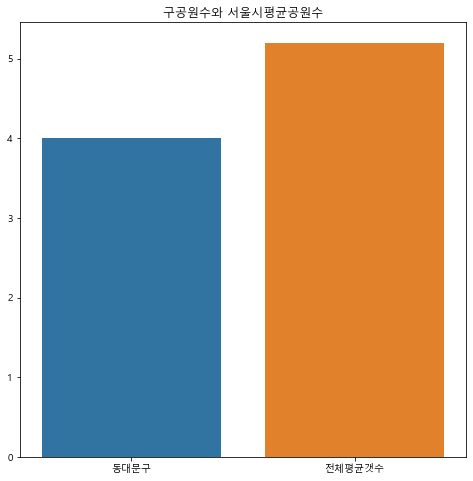

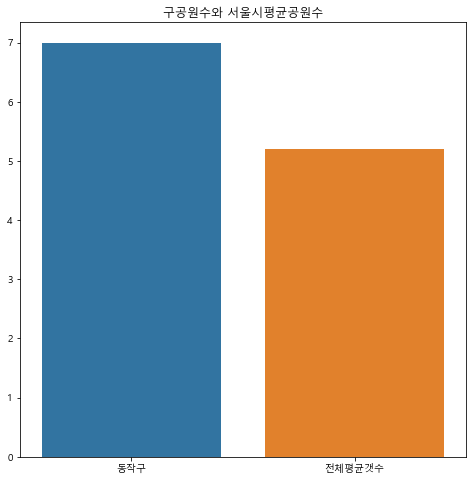

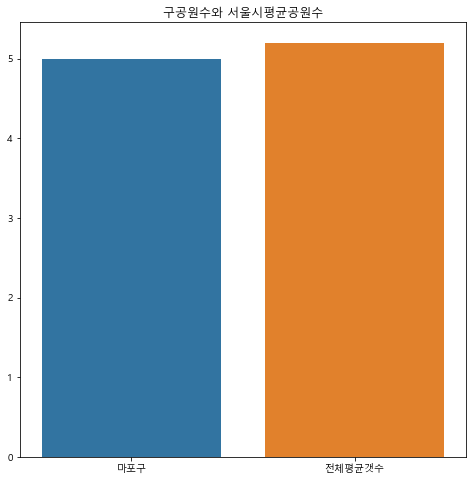

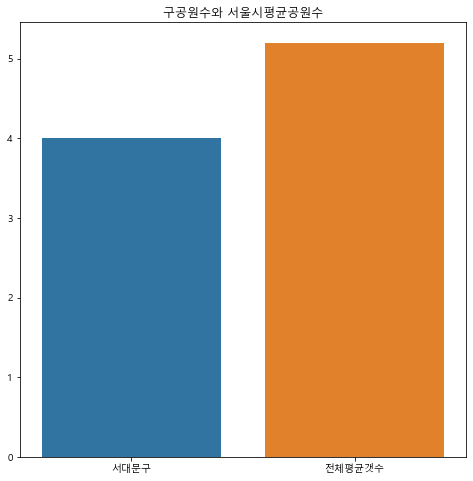

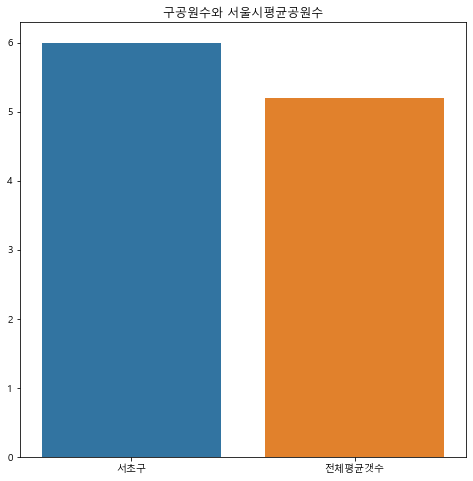

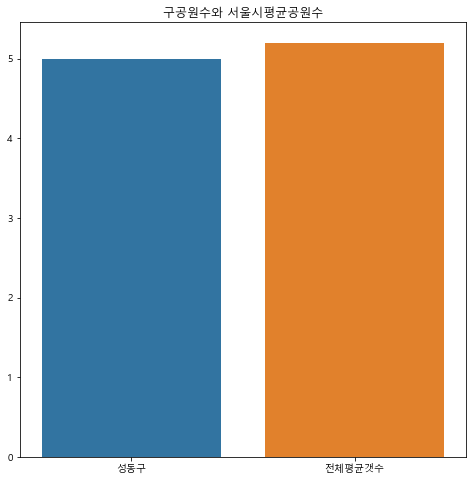

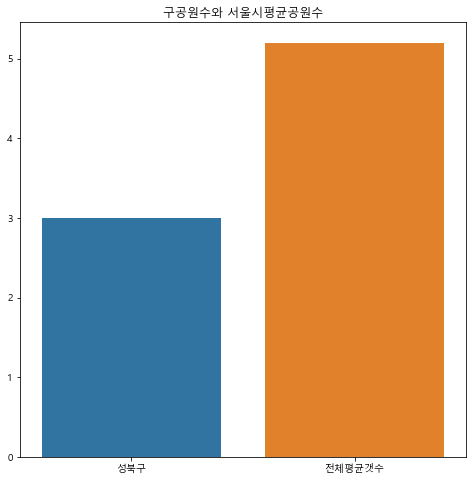

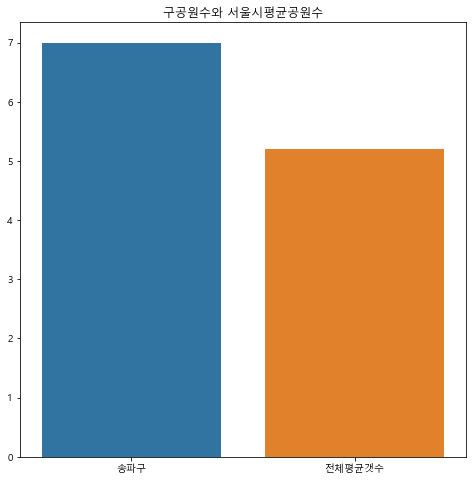

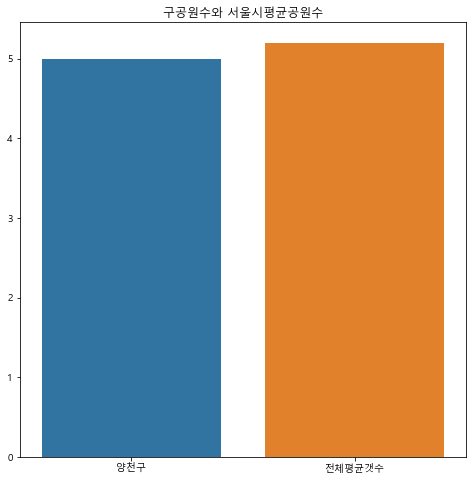

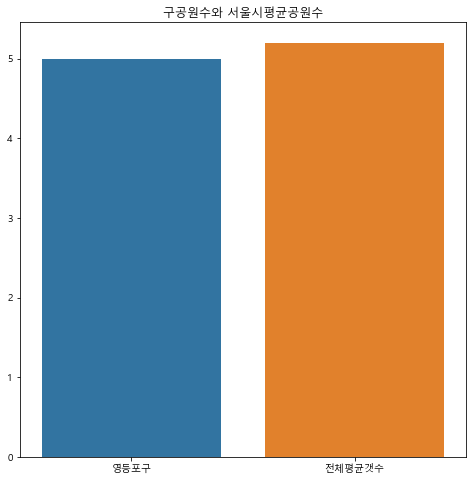

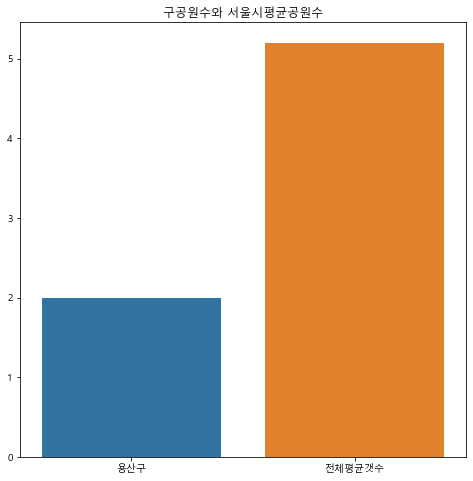

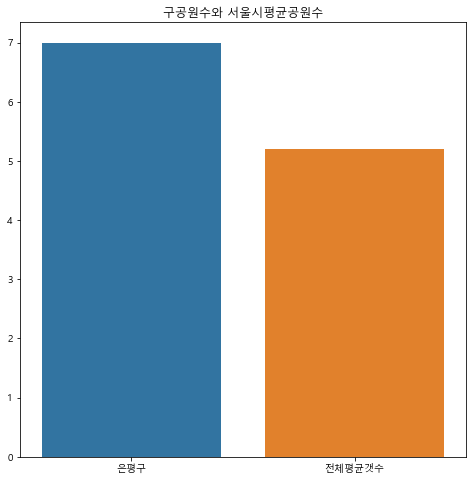

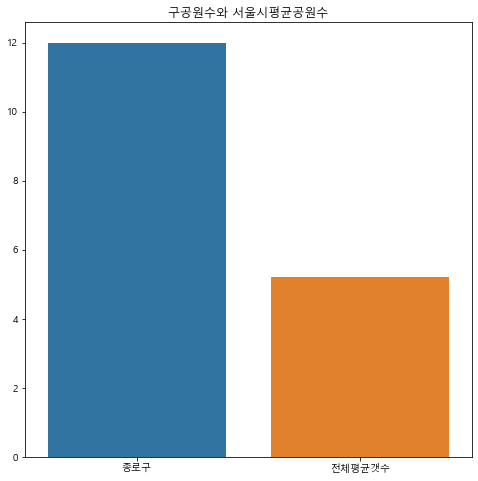

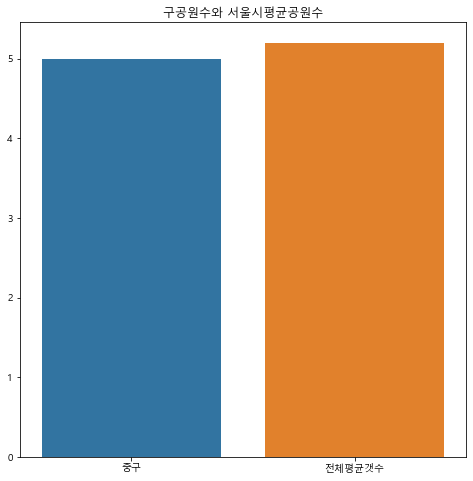

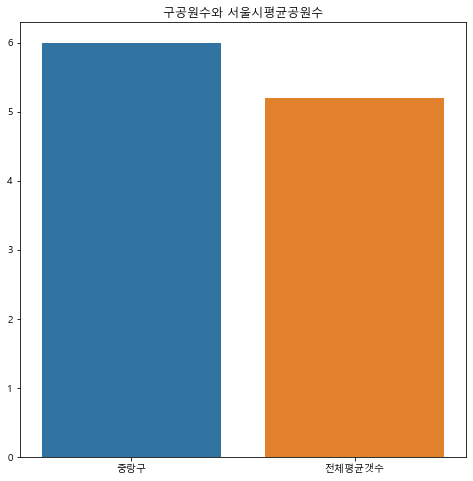

In [67]:
for gu in park_rate['지역']:
    park_per_rate=park_rate[park_rate['지역'].str.contains(gu)]
    park_per_rate.columns = ['지역',gu,'전체평균갯수']
    plt.figure(figsize=(8,8))
    plt.title("구공원수와 서울시평균공원수")
    sns.barplot(data=park_per_rate)
    plt.savefig('../../img/' + gu + '.png', bbox_inches='tight')
    